Silahkan cari dataset pada open data dengan format csv/txt kemudian buat project pada google colab dan lakukan :



*   Load dataset hasil download
*   Penerapan functional programming (lambda, recursion, first class)
*   Penerapan numpy (statistic, join, splitting, matriks)
*   Penerapan pandas (filter, replace, group)
*   Penerapan visualization (matplotlib, seaborn)







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Loan_default.csv')
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
255342,False
255343,False
255344,False
255345,False


In [ ]:
df['duplicated']=df.duplicated()
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,duplicated
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,False
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,False
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0,False
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1,False
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0,False
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0,False


In [ ]:
df_new = df.drop_duplicates()
df_new

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,duplicated
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,False
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,False
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0,False
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1,False
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0,False
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0,False


**Functional Programming - Lambda**

In [ ]:
# menghitung Debt-to-Income Ratio
df_new['DTIRatio'] = df_new.apply(lambda row: row['LoanAmount'] / row['Income'], axis=1)

print(df_new)

            LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0       I38PQUQS96   56   85994       50587          520              80   
1       HPSK72WA7R   69   50432      124440          458              15   
2       C1OZ6DPJ8Y   46   84208      129188          451              26   
3       V2KKSFM3UN   32   31713       44799          743               0   
4       EY08JDHTZP   60   20437        9139          633               8   
...            ...  ...     ...         ...          ...             ...   
255342  8C6S86ESGC   19   37979      210682          541             109   
255343  98R4KDHNND   32   51953      189899          511              14   
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0             

**Functional Programming - Recursion**

In [ ]:
# Fungsi untuk menghitung total jumlah pinjaman menggunakan loop
def total_loan(loans):
    total = 0
    for loan in loans:
        total += loan
    return total

# Mengambil kolom LoanAmount dari DataFrame
loan_amounts = df_new['LoanAmount']

# Menghitung total jumlah pinjaman
total = total_loan(loan_amounts)

# Menampilkan hasil total jumlah pinjaman
print(f"Total loan amount (iteration): {total}")

Total loan amount (iteration): 32576880572


**Functional Programming - First Class**

In [ ]:
# First-class function yang menerima fungsi lain sebagai argumen
def apply_operation(func, data):
    return func(data)

# Fungsi sederhana untuk menghitung rata-rata
def calculate_average(data):
    return sum(data) / len(data)

loan_amounts = df_new['LoanAmount']

# Menggunakan first-class function
average_loan = apply_operation(calculate_average, loan_amounts)
print(f"Rata-rata jumlah pinjaman: {average_loan}")

Rata-rata jumlah pinjaman: 127578.86551242035


**NUMPY - Statistik**

In [ ]:
# Mengonversi beberapa kolom ke dalam format NumPy array untuk operasi
loan_amounts = np.array(df_new['LoanAmount'])
incomes = np.array(df_new['Income'])
credit_scores = np.array(df_new['CreditScore'])

# Statistika dasar dengan NumPy
mean_loan = np.mean(loan_amounts)        # Rata-rata pinjaman
median_income = np.median(incomes)       # Median pendapatan
std_credit_score = np.std(credit_scores) # Standar deviasi skor kredit

print(f"Rata-rata Pinjaman: {mean_loan}")
print(f"Median Pendapatan: {median_income}")
print(f"Standar Deviasi Skor Kredit: {std_credit_score}")

Rata-rata Pinjaman: 127578.86551242035
Median Pendapatan: 82466.0
Standar Deviasi Skor Kredit: 158.9035554418735


**NUMPY - Join**

In [ ]:
# Join arrays
loan_amounts = df_new['LoanAmount']
incomes = df_new['Income']
combined_array = np.column_stack((loan_amounts, incomes))  # Menggabungkan LoanAmount dan Income
print("\nGabungan Pinjaman dan Pendapatan:\n", combined_array)


Gabungan Pinjaman dan Pendapatan:
 [[ 50587  85994]
 [124440  50432]
 [129188  84208]
 ...
 [208294  84820]
 [ 60575  85109]
 [ 18481  22418]]


**NUMPY - Splitting**

In [ ]:
# Splitting arrays (membagi matriks)
loan_amounts_split = np.array_split(loan_amounts, 2)  # Membagi LoanAmount menjadi 2 bagian
print("\nPembagian LoanAmount menjadi 2:\n", loan_amounts_split)


Pembagian LoanAmount menjadi 2:
 [0          50587
1         124440
2         129188
3          44799
4           9139
           ...  
127669    192563
127670      5302
127671    191496
127672    238068
127673    138691
Name: LoanAmount, Length: 127674, dtype: int64, 127674    182363
127675      9641
127676    168023
127677     61751
127678    114627
           ...  
255342    210682
255343    189899
255344    208294
255345     60575
255346     18481
Name: LoanAmount, Length: 127673, dtype: int64]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


**NUMPY - Matriks**

In [ ]:
# Matriks operasi sederhana (contoh menghitung matriks pinjaman dan pendapatan)
matrix = np.array([loan_amounts, incomes])
transposed_matrix = np.transpose(matrix)
print("\nMatriks Pinjaman dan Pendapatan yang Transpose:\n", transposed_matrix)

# Operasi Matriks (contoh dot product)
loan_income_dot_product = np.dot(loan_amounts, incomes)
print("\nDot product antara LoanAmount dan Income:\n", loan_income_dot_product)


Matriks Pinjaman dan Pendapatan yang Transpose:
 [[ 50587  85994]
 [124440  50432]
 [129188  84208]
 ...
 [208294  84820]
 [ 60575  85109]
 [ 18481  22418]]

Dot product antara LoanAmount dan Income:
 2686960113600801


**Pandas - Filter**

In [ ]:
# Filter penghasilan lebih dari 50.000 dan skor kredit lebih dari 700
filtered_df_new = df_new[(df_new['Income'] > 50000) & (df_new['CreditScore'] > 700)]
print("Filtered Data:\n", filtered_df_new)

Filtered Data:
             LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
5       A9S62RQ7US   25   90298       90448          720              18   
25      D17PDP8LBL   50   81649       78193          839             110   
32      KD97QJJFD8   59  102292       55337          840               6   
33      O8G74YT5W3   45   85673       48773          787             103   
39      5FENBP2UV8   69   87295       16281          707              94   
...            ...  ...     ...         ...          ...             ...   
255329  QXBHNXNA9X   34   53658      187245          847              35   
255330  QU29Z1EVQI   59  104108       13015          761              61   
255332  XMA3UCYP0L   67   76558      122456          734              90   
255341  AKXAXQN7PG   40  129890      116119          701              38   
255345  JAO28CPL4H   42   85109       60575          809              40   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  

**Pandas - Replace**

In [ ]:
# Mengganti 'Single' dengan 'Unmarried' di kolom 'MaritalStatus'
df_new['MaritalStatus'] = df_new['MaritalStatus'].replace('Single', 'Unmarried')
print("Data setelah Replace:\n", df_new[['LoanID', 'MaritalStatus']])

Data setelah Replace:
             LoanID MaritalStatus
0       I38PQUQS96      Divorced
1       HPSK72WA7R       Married
2       C1OZ6DPJ8Y      Divorced
3       V2KKSFM3UN       Married
4       EY08JDHTZP      Divorced
...            ...           ...
255342  8C6S86ESGC       Married
255343  98R4KDHNND      Divorced
255344  XQK1UUUNGP       Married
255345  JAO28CPL4H     Unmarried
255346  ZTH91CGL0B      Divorced

[255347 rows x 2 columns]


**Pandas - Grouping**

In [ ]:
# Group by 'EmploymentType' dan menghitung rata-rata penghasilan dan jumlah pinjaman
grouped_df = df_new.groupby('EmploymentType')[['Income', 'LoanAmount']].mean()
print("Rata-rata Penghasilan dan Jumlah Pinjaman berdasarkan EmploymentType:\n", grouped_df)

Rata-rata Penghasilan dan Jumlah Pinjaman berdasarkan EmploymentType:
                       Income     LoanAmount
EmploymentType                             
Full-time       82890.297961  127469.866595
Part-time       82389.357367  127329.702904
Self-employed   82446.709038  127436.700232
Unemployed      82272.366508  128079.958182


**Visualization**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

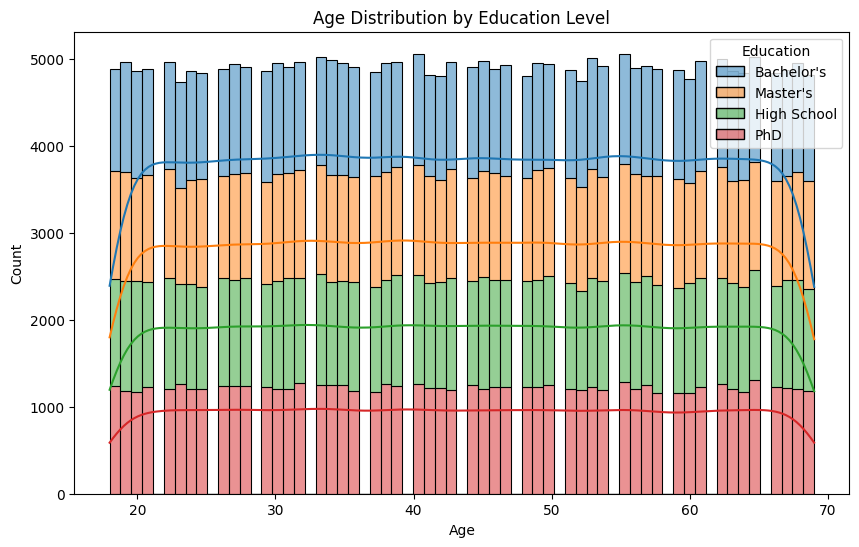

In [ ]:
# Visualisasi histogram Age berdasarkan Education
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Education', multiple='stack', kde=True)

# Menambahkan judul dan label
plt.title('Age Distribution by Education Level')
plt.xlabel('Age')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

<ipython-input-22-ab5e23671f3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EmploymentType', y='Income', data=df_new, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gr

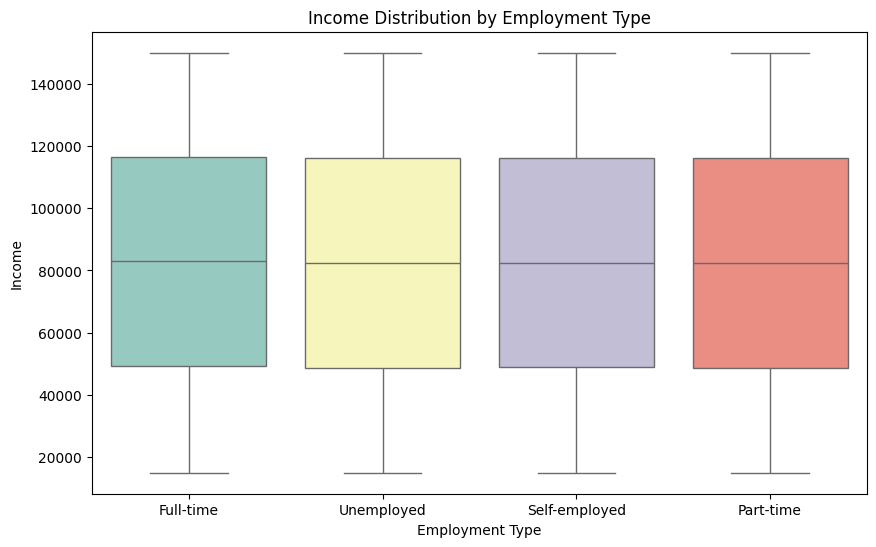

In [ ]:
# Boxplot untuk Income berdasarkan EmploymentType
plt.figure(figsize=(10, 6))
sns.boxplot(x='EmploymentType', y='Income', data=df_new, palette='Set3')
plt.title('Income Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Income')
plt.show()


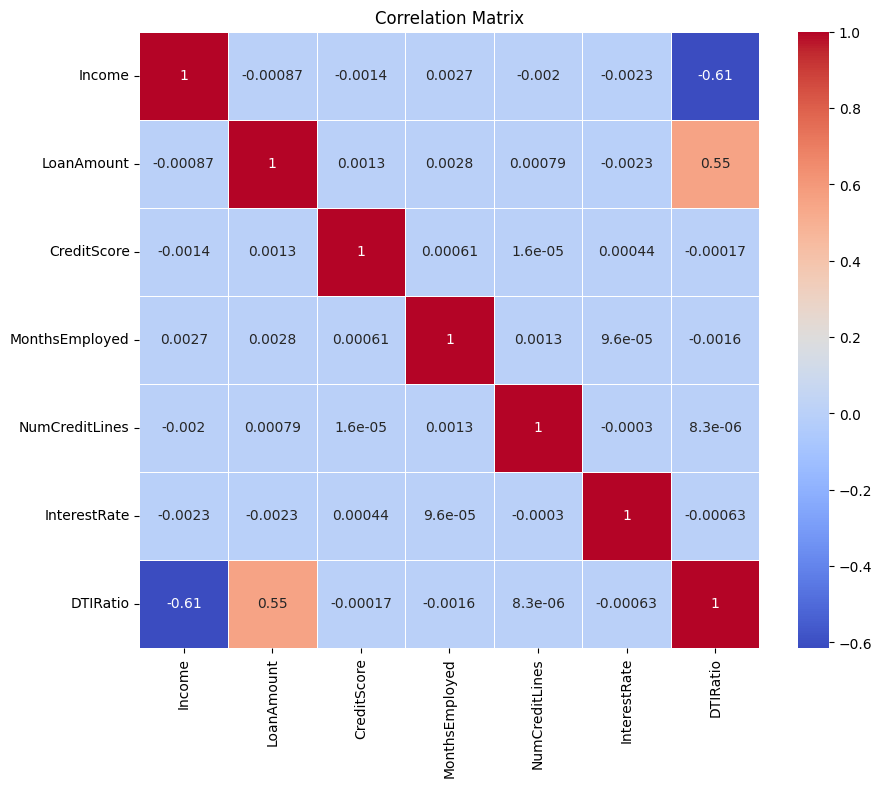

In [ ]:
# Heatmap untuk melihat korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df_new[['Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'DTIRatio']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
